In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
DATA_PATH = '../../data/combined_tripdata.csv'
data = pd.read_csv(DATA_PATH)
print(data.head())

C:\Users\Swapnil.Patil\AppData\Local\Temp\ipykernel_8320\1721040238.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DATA_PATH)


            ride_id rideable_type           started_at             ended_at  \
0  A847FADBBC638E45   docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  5405B80E996FF60D   docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  5DD24A79A4E006F4   docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  2A59BBDF5CDBA725   docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  27AD306C119C6158   docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

             start_station_name start_station_id             end_station_name  \
0                  Eckhart Park             86.0  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave            503.0              Kosciuszko Park   
2          McClurg Ct & Erie St            142.0   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St            216.0       Wood St & Augusta Blvd   
4          Rush St & Hubbard St            125.0   Sheridan Rd & Lawrence Ave   

  end_station_id  start_lat  start_lng

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25256682 entries, 0 to 25256681
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 2.4+ GB
None


In [6]:
print(data.describe())

          start_lat     start_lng       end_lat       end_lng
count  2.525668e+07  2.525668e+07  2.522829e+07  2.522829e+07
mean   4.190235e+01 -8.764650e+01  4.190264e+01 -8.764668e+01
std    4.529851e-02  2.808681e-02  5.557035e-02  8.342695e-02
min    4.163000e+01 -8.794000e+01  0.000000e+00 -1.440500e+02
25%    4.188103e+01 -8.766000e+01  4.188132e+01 -8.766014e+01
50%    4.189897e+01 -8.764312e+01  4.189993e+01 -8.764331e+01
75%    4.193000e+01 -8.762932e+01  4.193000e+01 -8.762932e+01
max    4.563503e+01 -7.379648e+01  8.796000e+01  1.525300e+02


In [7]:
# Check for non-standard datetime formats in the 'started_at' column
data['started_at'] = data['started_at'].astype(str)  # Ensure it's a string for processing
data['ended_at'] = data['ended_at'].astype(str)

In [8]:
# Identify problematic rows
invalid_start_times = data[~data['started_at'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}(\.\d+)?', na=False)]
invalid_end_times = data[~data['ended_at'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}(\.\d+)?', na=False)]
# Display problematic rows
invalid_start_times.head(), invalid_end_times.head()

(Empty DataFrame
 Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
 Index: [],
 Empty DataFrame
 Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
 Index: [])

In [9]:
# Convert timestamps while handling extra milliseconds
data['started_at'] = pd.to_datetime(data['started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data['ended_at'] = pd.to_datetime(data['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25256682 entries, 0 to 25256681
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 2.4+ GB
None


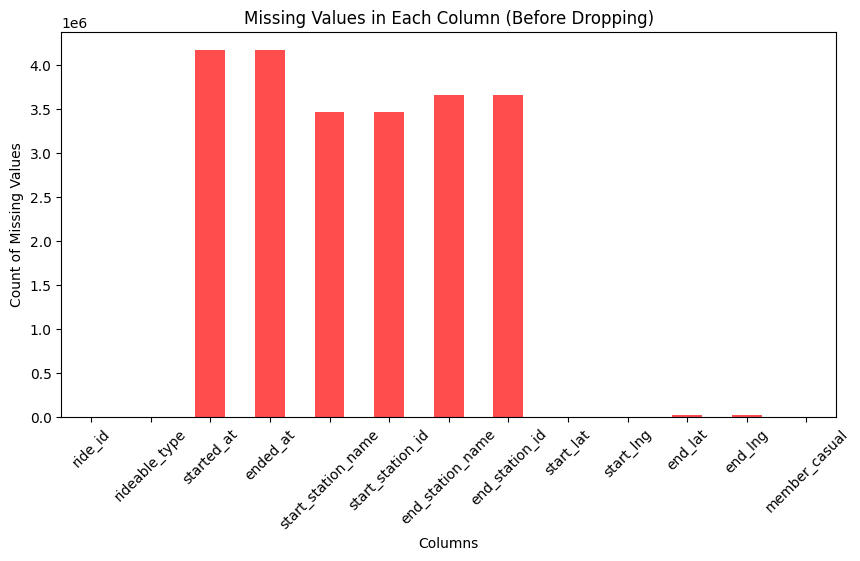

In [11]:
# Plot missing values before dropping
plt.figure(figsize=(10, 5))
data.isna().sum().plot(kind='bar', color='red', alpha=0.7)
plt.title("Missing Values in Each Column (Before Dropping)")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Drop rows with invalid datetime conversion (NaT values)
data = data.dropna(subset=['started_at', 'ended_at'])

# Verify the conversion
data[['started_at', 'ended_at']].head()

,started_at,ended_at
0,2020-04-26 17:45:14,2020-04-26 18:12:03
1,2020-04-17 17:08:54,2020-04-17 17:17:03
2,2020-04-01 17:54:13,2020-04-01 18:08:36
3,2020-04-07 12:50:19,2020-04-07 13:02:31
4,2020-04-18 10:22:59,2020-04-18 11:15:54


In [13]:
# Remove rows where 'ended_at' is earlier than 'started_at' (data inconsistencies)
data = data[data['ended_at'] >= data['started_at']]

In [14]:
# Compute ride duration in minutes
# Compute ride distance using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60
data['ride_distance_km'] = data.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)
data['start_hour'] = data['started_at'].dt.hour
data['start_dayofweek'] = data['started_at'].dt.dayofweek


In [15]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_duration', 'ride_distance_km', 'start_hour',
       'start_dayofweek'],
      dtype='object')

C:\Users\Swapnil.Patil\AppData\Local\Temp\ipykernel_8320\1723106348.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=eda_sample['start_hour'], ax=axes[1, 0], palette="Blues")
C:\Users\Swapnil.Patil\AppData\Local\Temp\ipykernel_8320\1723106348.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=eda_sample['start_dayofweek'], ax=axes[1, 1], palette="Greens")


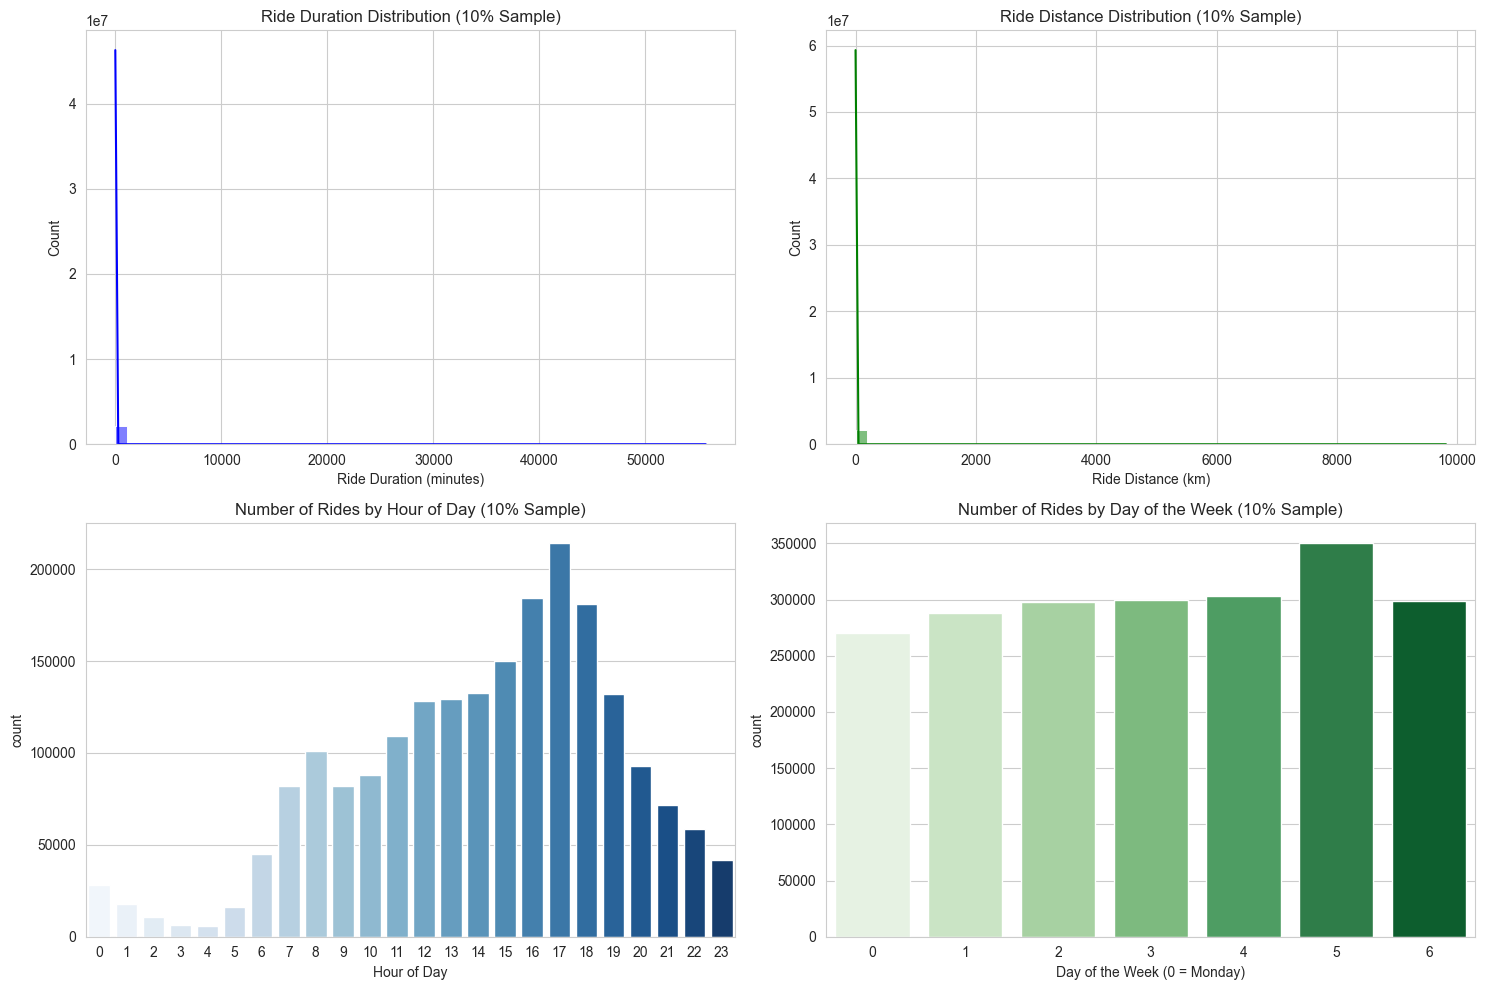

In [16]:
# Set plot style
sns.set_style("whitegrid")

# Take a random 10% sample of the data for EDA
eda_sample = data.sample(frac=0.1, random_state=42)

# Create subplots for key EDA visualizations using the sampled data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ride Duration Distribution
sns.histplot(eda_sample['ride_duration'], bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Ride Duration Distribution (10% Sample)")
axes[0, 0].set_xlabel("Ride Duration (minutes)")

# Ride Distance Distribution
sns.histplot(eda_sample['ride_distance_km'], bins=50, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Ride Distance Distribution (10% Sample)")
axes[0, 1].set_xlabel("Ride Distance (km)")

# Rides per Hour
sns.countplot(x=eda_sample['start_hour'], ax=axes[1, 0], palette="Blues")
axes[1, 0].set_title("Number of Rides by Hour of Day (10% Sample)")
axes[1, 0].set_xlabel("Hour of Day")

# Rides per Day of Week
sns.countplot(x=eda_sample['start_dayofweek'], ax=axes[1, 1], palette="Greens")
axes[1, 1].set_title("Number of Rides by Day of the Week (10% Sample)")
axes[1, 1].set_xlabel("Day of the Week (0 = Monday)")

plt.tight_layout()
plt.show()


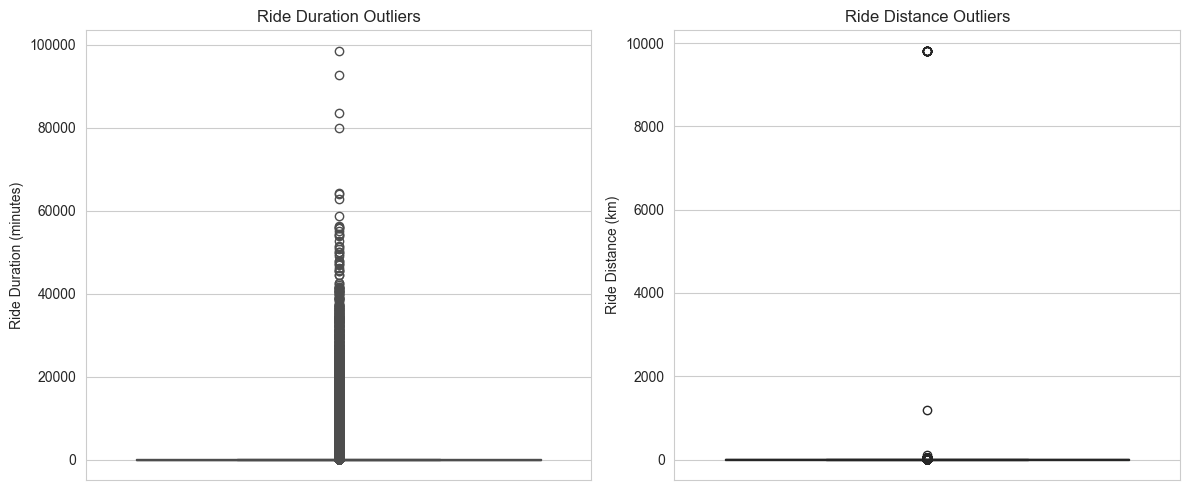

In [17]:
# Drop unnecessary columns
data_cleaned = data.drop(columns=['ride_id', 'started_at', 'ended_at', 'start_station_name', 'end_station_name'])

# Encode categorical variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['rideable_type', 'member_casual'], drop_first=True)

# Proceed with Outlier Detection
# Boxplots to visualize outliers in ride duration and distance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=data_cleaned['ride_duration'], ax=axes[0], color='blue')
axes[0].set_title("Ride Duration Outliers")
axes[0].set_ylabel("Ride Duration (minutes)")

sns.boxplot(y=data_cleaned['ride_distance_km'], ax=axes[1], color='green')
axes[1].set_title("Ride Distance Outliers")
axes[1].set_ylabel("Ride Distance (km)")

plt.tight_layout()
plt.show()

# Anomaly Detection

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Select features for anomaly detection
features = ['ride_duration', 'ride_distance_km', 'start_hour', 'start_dayofweek']
data_subset = data[features]
# data_subset = data_subset.sample(frac=1, random_state=42)

# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Split data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Display dataset shape
print(f"Training Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

Training Set Shape: (16863291, 4), Testing Set Shape: (4215823, 4)


Epoch 1/2
2107912/2107912 ━━━━━━━━━━━━━━━━━━━━ 2294s 1ms/step - loss: nan - val_loss: nan
Epoch 2/2
2107912/2107912 ━━━━━━━━━━━━━━━━━━━━ 2232s 1ms/step - loss: nan - val_loss: nan


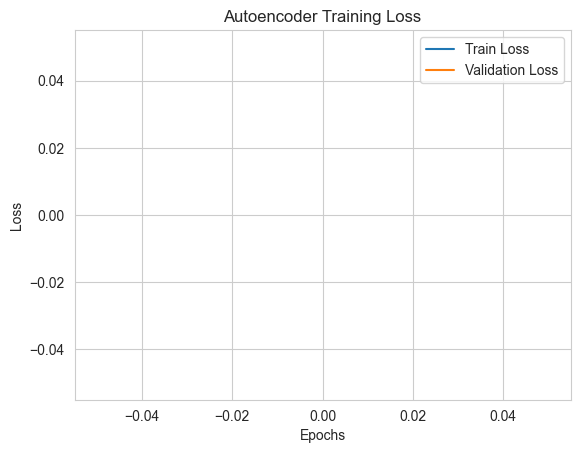

In [29]:
# Define the Autoencoder model
input_dim = X_train.shape[1]  # Number of features

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Compile model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=2,
    batch_size=8,
    validation_data=(X_test, X_test),
    verbose=1
)

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

131745/131745 ━━━━━━━━━━━━━━━━━━━━ 60s 453us/step


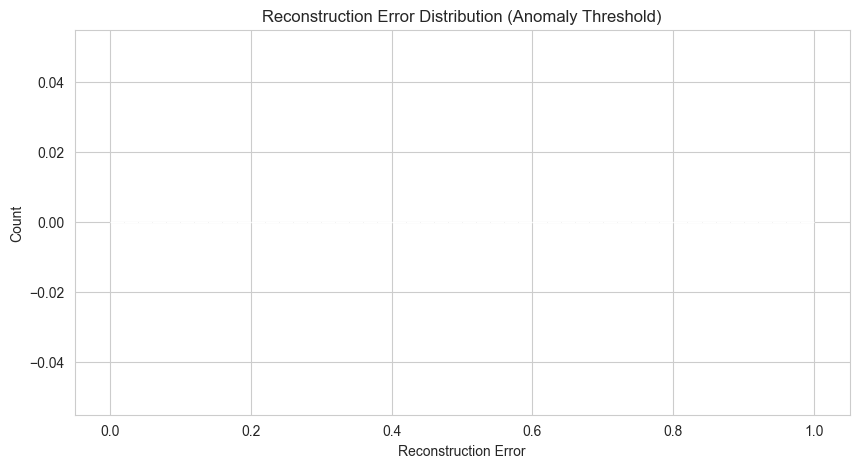

Number of Anomalies Detected: 0


In [30]:
# Compute reconstruction error
reconstructed = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(reconstructed - X_test), axis=1)

# Define anomaly threshold (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)

# Flag anomalies
anomalies = reconstruction_error > threshold

# Plot anomaly distribution
plt.figure(figsize=(10, 5))
sns.histplot(reconstruction_error, bins=50, kde=True, color='blue')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.title("Reconstruction Error Distribution (Anomaly Threshold)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.show()

# Print number of anomalies detected
print(f"Number of Anomalies Detected: {np.sum(anomalies)}")

In [27]:
# Get anomaly indices
anomaly_indices = np.where(anomalies)[0]

# Retrieve original values of detected anomalies
anomalous_rides = pd.DataFrame(scaler.inverse_transform(X_test[anomaly_indices]), columns=features)

# Show detected anomalies
print("Detected Anomalous Rides:")
print(anomalous_rides.head(10))

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.